# Hotels Dataset Analysis
Exercise for Data Visualization Subject, Master in Data Science, UOC.

### Introduction
We are working with a dataset of Hotel Reservations. Reservations sometimes are cancelled, which can cause an economic loss for the hotel. 
We want to see if we can build a  model to predict whether a reservation will be cancelled or not. We will use a Logistic Regression.

### Dataset exploration

#### Basic Exploration
We perform some basic data exploration

In [164]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [165]:
# Load the datasets
df = pd.read_csv('data/hotel_bookings.csv')

In [166]:
# Summary of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [167]:
# Visualize some rows of our dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [168]:
# Check the columns of the dataset
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [169]:
# Check the percetange of Cancelled reservations
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

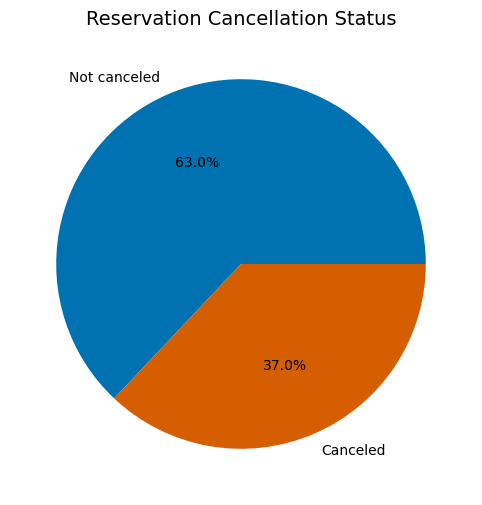

In [170]:
import matplotlib.pyplot as plt

# Define custom colors for colorblind-friendly visualization
colors = ['#0072B2', '#D55E00']  # Blue for "Not canceled", Red for "Canceled"

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
ax.pie(
    df['is_canceled'].value_counts(),
    labels=["Not canceled", "Canceled"],
    autopct='%4.1f%%',
    colors=colors
)

# Add title for clarity
ax.set_title("Reservation Cancellation Status", fontsize=14)

# Display the chart
plt.show()


#### Data Cleaning
We will continue exploreing and clean (some of) the variables we want to use for our model

Text(0, 0.5, 'Number of reservations')

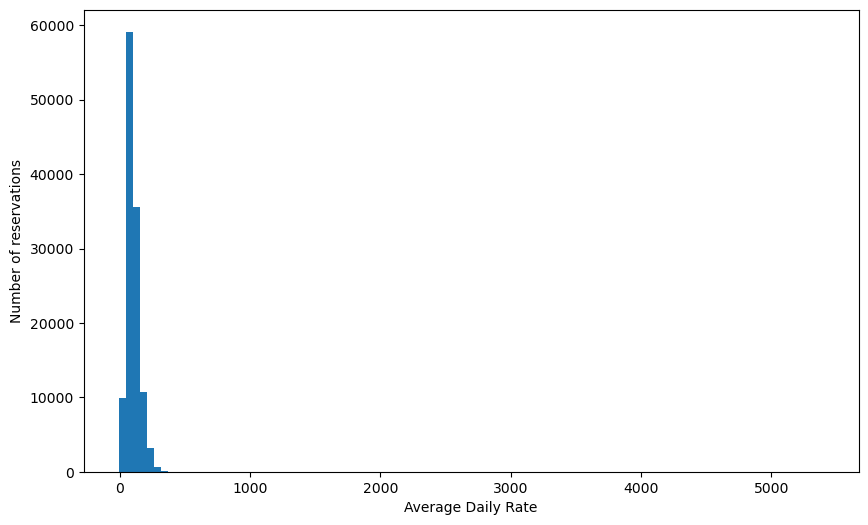

In [171]:
# Histogram of adr
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
ax.hist(df['adr'], bins=100);
# add labels
ax.set_xlabel('Average Daily Rate')
ax.set_ylabel('Number of reservations')

In [172]:
df['adr'].sort_values()

14969       -6.38
0            0.00
2534         0.00
2536         0.00
33283        0.00
           ...   
13142      450.00
103912     451.50
15083      508.00
111403     510.00
48515     5400.00
Name: adr, Length: 119390, dtype: float64

We see that there are many values at 0, one which is a negative value and a value much too high, we use the following plot to asses them better.

Text(0, 0.5, 'Average Daily Rate (adr)')

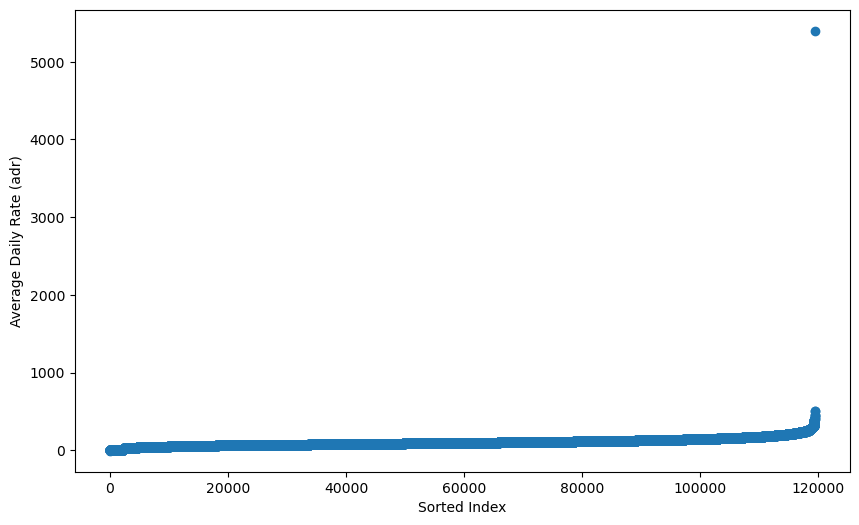

In [173]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
ax.plot(df['adr'].sort_values().reset_index(drop=True), 'o')
ax.set_xlabel('Sorted Index')
ax.set_ylabel('Average Daily Rate (adr)')

In [174]:
# Remove outliers from 'adr' column
df = df[df['adr'] < 1000]
df = df[df['adr'] > 0]


Text(0, 0.5, 'Number of reservations')

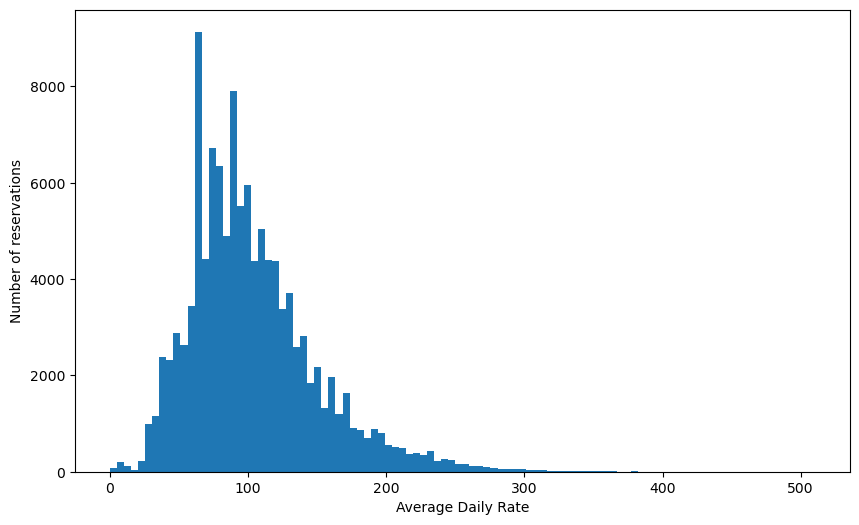

In [175]:
# Histogram of adr
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
ax.hist(df['adr'], bins=100);
# add labels
ax.set_xlabel('Average Daily Rate')
ax.set_ylabel('Number of reservations')

#### Feature exploration
We explore the features that will be used as predictors for our model

##### By Month of the year

In [176]:
# Convert 'arrival_date_month' from String to Number
month_dict = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
df['arrival_date_month_num'] = df['arrival_date_month'].map(month_dict)

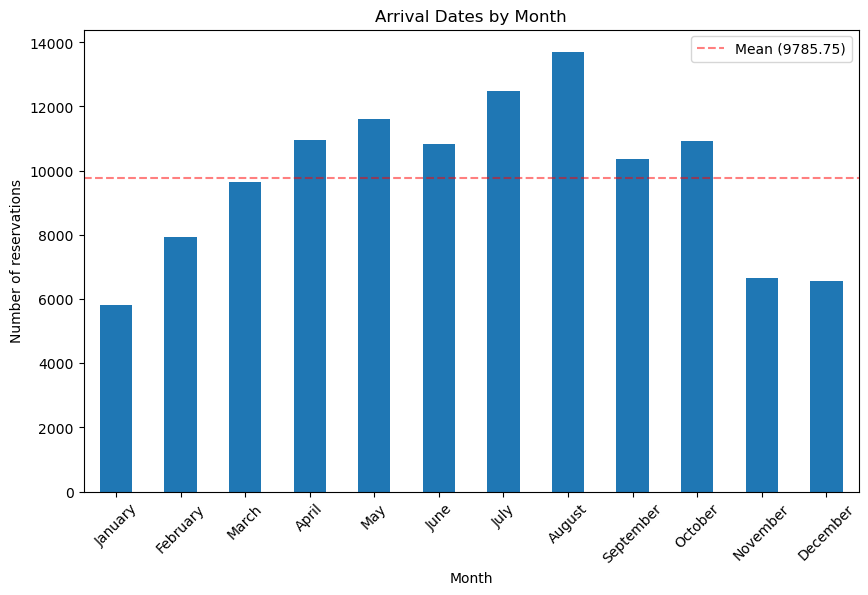

In [177]:
# Aggregate and sort by numeric month values
month_counts = (
    df['arrival_date_month_num']
    .value_counts()
    .sort_index()
)  # Sort by numeric month

# Map back to month names
month_labels = [k for k, v in sorted(month_dict.items(), key=lambda x: x[1])]

# Calculate mean
mean_value = month_counts.mean()

# Plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
month_counts.plot(kind='bar', label='_nolegend_', ax=ax)
plt.xticks(ticks=range(len(month_labels)), labels=month_labels, rotation=45)

plt.axhline(mean_value, color='red', linestyle='--', alpha=0.5, label=f'Mean ({mean_value:.2f})')
plt.xlabel('Month')
plt.ylabel('Number of reservations')
plt.title('Arrival Dates by Month')
plt.legend()
plt.show()

##### By Week of the year


In [178]:
# Since we will use this plot multiple time we create a small function

def plot_occupancy(df, col='arrival_date_week_number'):
    """
    Plot a bar chart of the value counts for a specified column in a DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        col (str): The column to analyze and plot (default is 'arrival_date_week_number').

    Returns:
        fig, ax: The matplotlib figure and axes objects for further customization.
    """
    fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
    df[col].value_counts().sort_index().plot(kind='bar', ax=ax, label='_nolegend_')
    
    # Add a horizontal line at the mean value
    mean_value = df[col].value_counts().mean()
    ax.axhline(mean_value, color='red', linestyle='--', alpha=0.5, label=f'Mean ({mean_value:.2f})')
    
    # Add labels and legend
    ax.set_xlabel(col)
    ax.set_ylabel('Reservation Count')
    ax.set_title(f'Distribution of {col}')
    ax.legend()
    
    return fig, ax


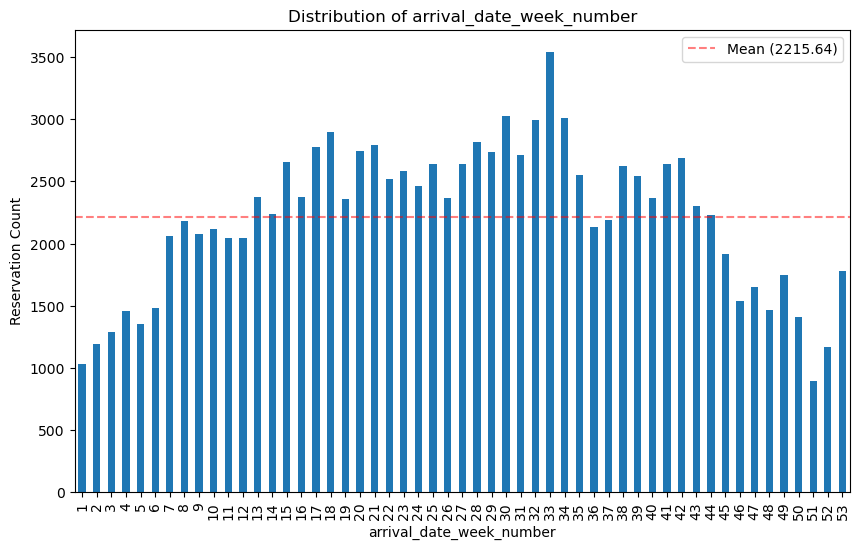

In [179]:
fig, ax = plot_occupancy(df, 'arrival_date_week_number')
# Add season box?

##### By Day of the Month

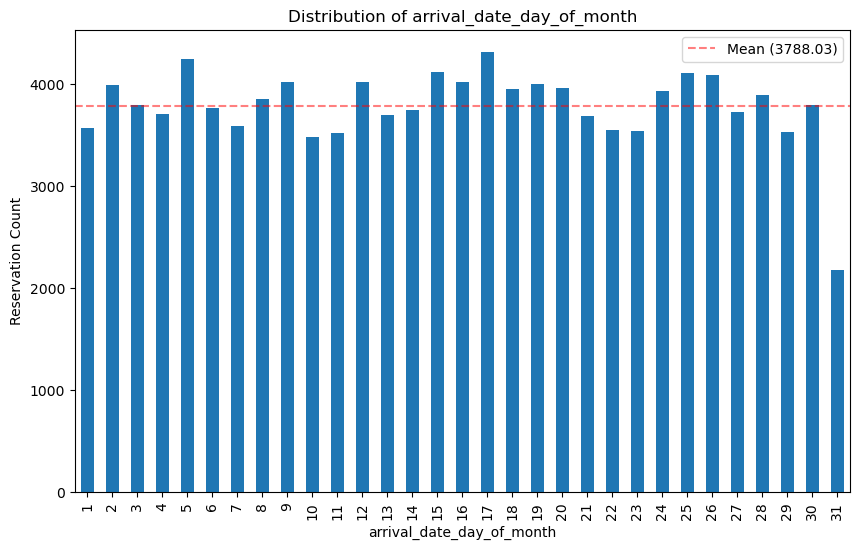

In [180]:
fig, ax = plot_occupancy(df, 'arrival_date_day_of_month')

##### By Year

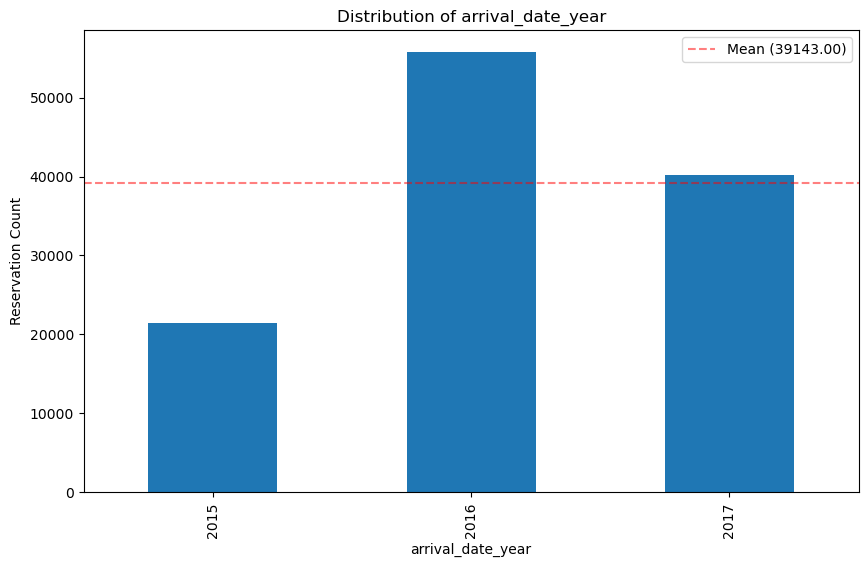

In [181]:
fig, ax = plot_occupancy(df, 'arrival_date_year')



##### Cancellation analysis 
Let's do the same analysis but only for the reservations that were canceled. Do we observe different distributions?

In [182]:
def plot_cancelation(df, col):
    """ArithmeticError
    """
    fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
    df.groupby(col)['is_canceled'].mean().plot(kind='bar', ax=ax, label="_nolegend_")
    # Add a horizontal line at the mean value
    mean_value = df['is_canceled'].mean()
    ax.axhline(mean_value, color='red', linestyle='--', alpha=0.5, label=f'Mean ({mean_value:.2f})')

    # Add labels and legend
    ax.set_xlabel(col)
    ax.set_ylabel('Cancellation rate')
    ax.set_title(f'Cancellation rate by {col}')
    ax.legend()

    return fig, ax

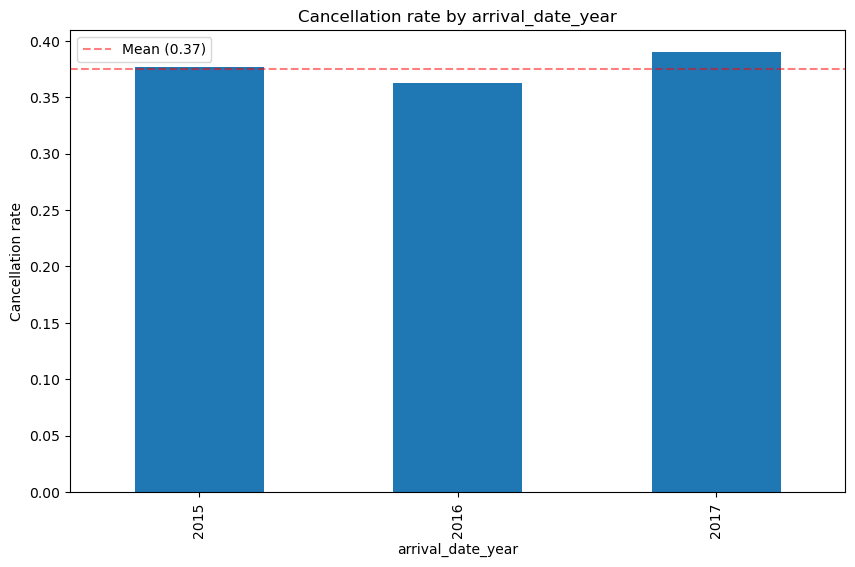

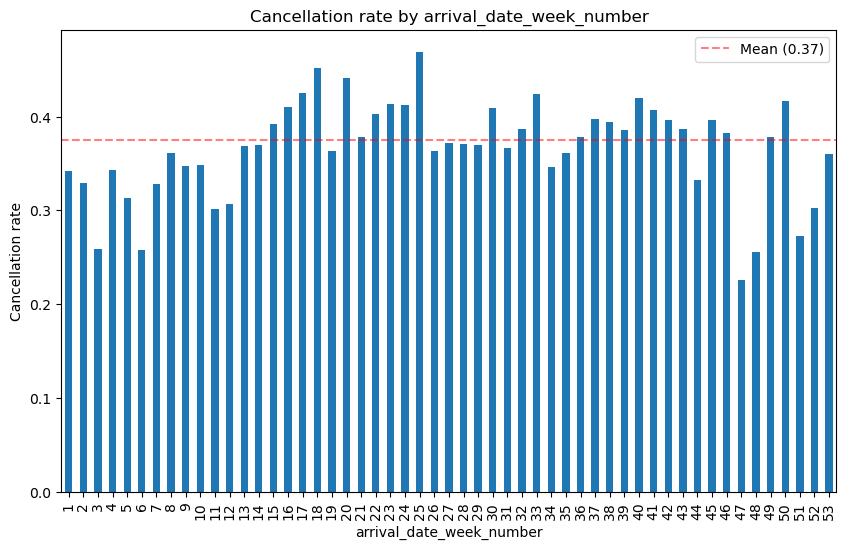

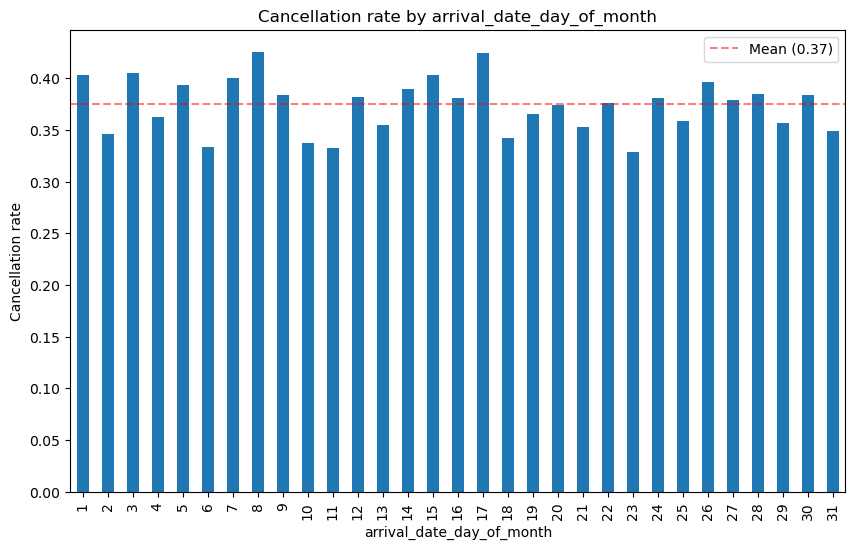

In [183]:
variables=['arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month']
for var in variables:
    plot_cancelation(df, var)



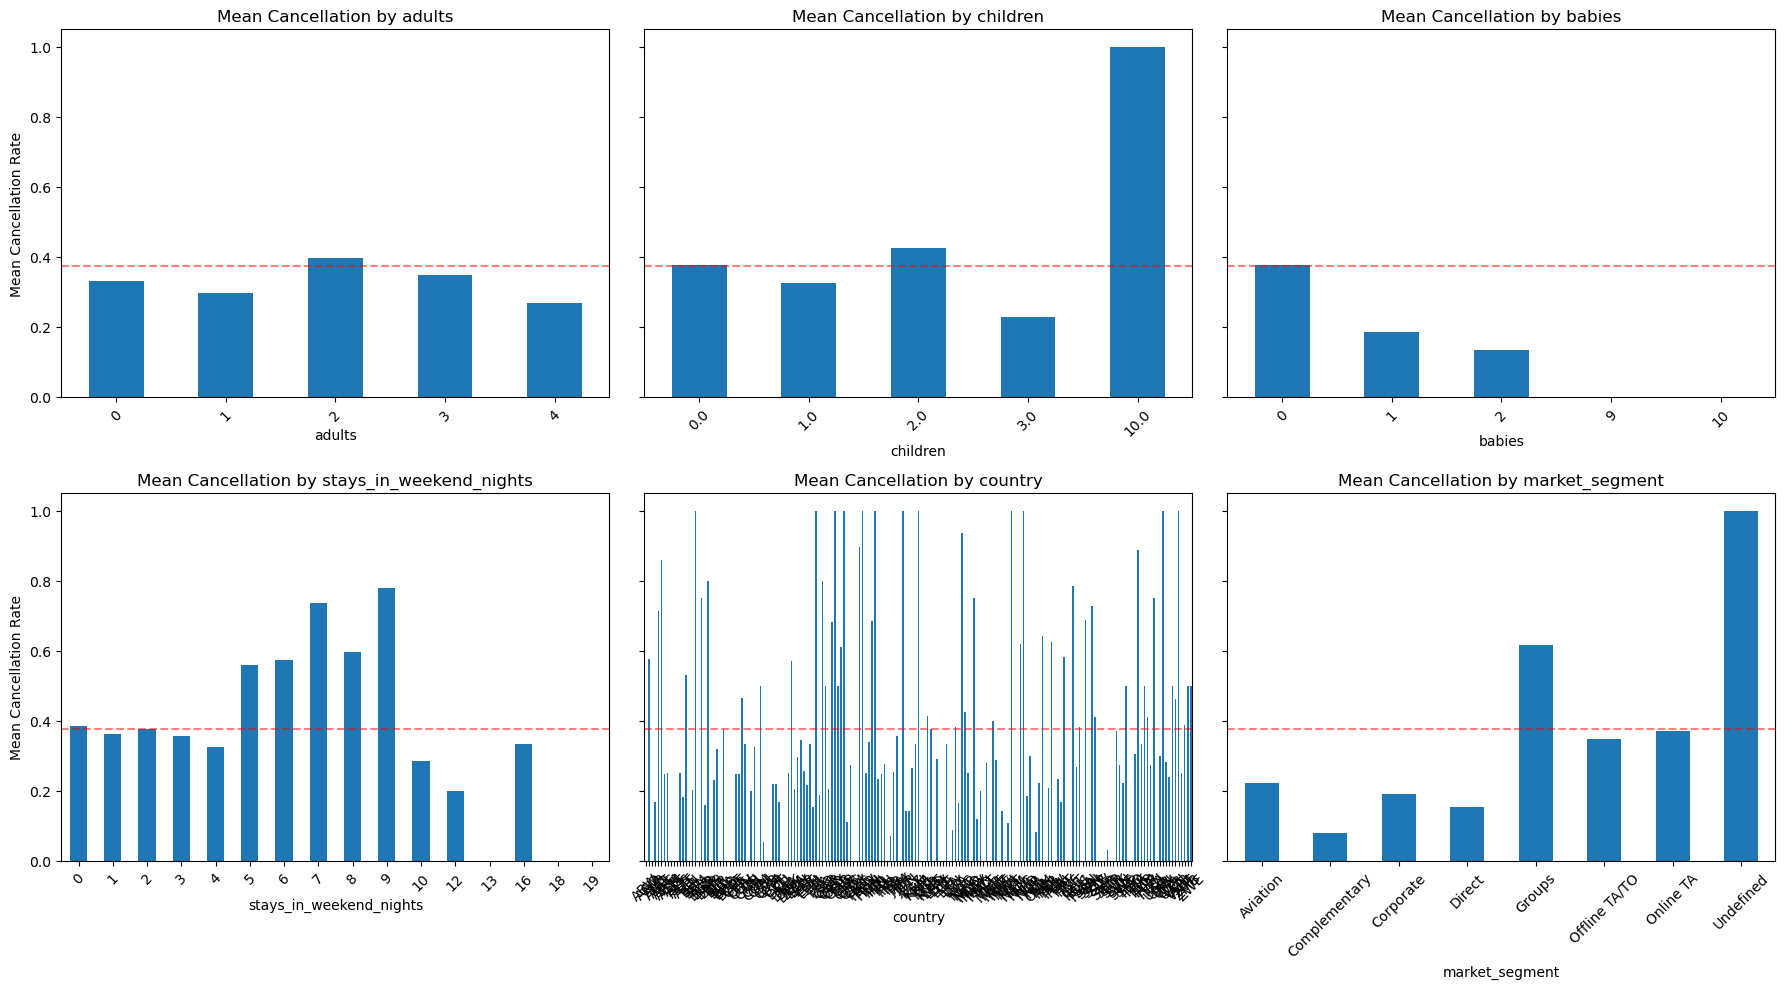

In [184]:
# Variables to plot
variables = ['adults', 'children', 'babies', 'stays_in_weekend_nights', 'country', 'market_segment']

# calculate mean
mean_value = df['is_canceled'].mean()

# Create a 3x2 grid for subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), dpi=100, sharey=True)  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Iterate over the variables and create plots
for i, variable in enumerate(variables):
    ax = axes[i]
    df.groupby(variable)['is_canceled'].mean().plot(kind='bar', ax=ax)
    # add mean as a red line
    ax.axhline(mean_value, color='red', linestyle='--', alpha=0.5, label=f'Mean ({mean_value:.2f})')
    ax.set_title(f"Mean Cancellation by {variable}")
    ax.set_ylabel('Mean Cancellation Rate')
    ax.set_xlabel(variable)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for clarity

# Hide any unused subplots (in case there are fewer variables than grid slots)
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Let's look at the temporal evolution of cancellations. How much time ahead do people cancell?

In [185]:
# Convert 'reservation_status_date' to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


In [186]:
df['reservation_date'] = pd.to_datetime({
    'year': df['arrival_date_year'],
    'month': df['arrival_date_month_num'],
    'day': df['arrival_date_day_of_month']
})


In [187]:
df['reservation_date']

2        2015-07-01
3        2015-07-01
4        2015-07-01
5        2015-07-01
6        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: reservation_date, Length: 117429, dtype: datetime64[ns]

In [188]:
df['reservation_to_checkout'] = df['reservation_status_date'] - df['reservation_date']
df['reservation_to_checkout']

2        1 days
3        1 days
4        2 days
5        2 days
6        2 days
          ...  
119385   7 days
119386   7 days
119387   7 days
119388   7 days
119389   9 days
Name: reservation_to_checkout, Length: 117429, dtype: timedelta64[ns]

In [189]:
df['days_before_cancelling'] = df['reservation_to_checkout'].dt.total_seconds() / 86400

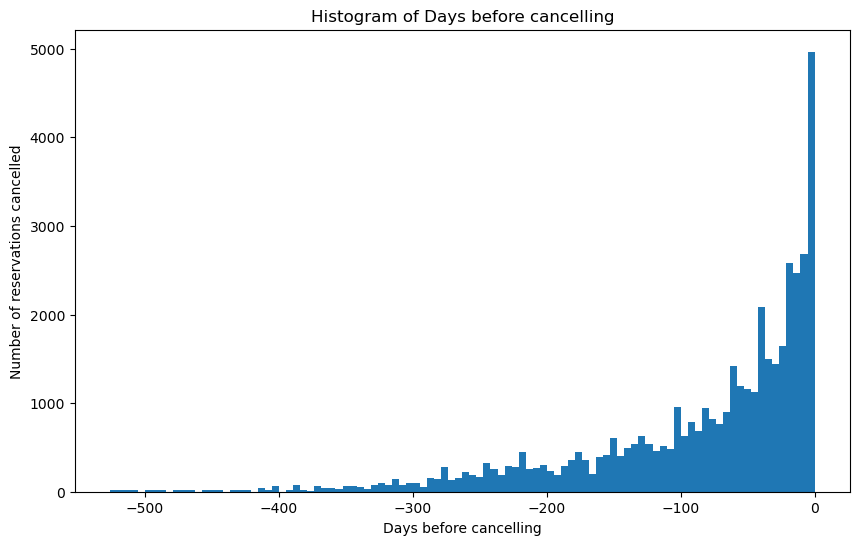

In [190]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

ax.hist(
    df.loc[df['is_canceled'] == 1, 'days_before_cancelling'],
    bins=100
)
plt.xlabel('Days before cancelling')
plt.ylabel('Number of reservations cancelled')
plt.title('Histogram of Days before cancelling')
plt.show()

### Logistic Regression

#### Feature Engineering

In [191]:
# Build a Linear Regression Model to predict if the reservation will be cancelled

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [192]:


# Build the pipeline
categorical_features = ['hotel',
                        'meal',
                        'country',
                        'market_segment',
                        'distribution_channel',
                        'reserved_room_type',
                        'deposit_type',
                        'customer_type',
                        'agent',
                        'company']

date_features = ['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month']

numerical_features = ['adults', 'children', 'babies',
                      'stays_in_weekend_nights', 'stays_in_week_nights',
                      'adr', 'total_of_special_requests', 'booking_changes',
                      'days_in_waiting_list']

boolean_features = ['is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'required_car_parking_spaces']

# Build pipeline for numerical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
# Build pipeline for categorical features
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Build pipepline for boolean features
boolean_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0))
])

# Combine all pipelines
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features),
    ('bool', boolean_pipeline, boolean_features)
])





In [193]:
for col in categorical_features:
    df[col] = df[col].astype(str)


In [194]:
# Define the model
model = LogisticRegression()

# Combine the preprocessor with the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Define the features and target
X = df[numerical_features + categorical_features + boolean_features]

y = df['is_canceled']


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [195]:
X_train

,adults,children,babies,stays_in_weekend_nights,stays_in_week_nights,adr,total_of_special_requests,booking_changes,days_in_waiting_list,hotel,...,distribution_channel,reserved_room_type,deposit_type,customer_type,agent,company,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,required_car_parking_spaces
27753,2,0.0,0,0,4,196.50,2,0,0,Resort Hotel,...,Direct,A,No Deposit,Transient,240.0,nan,1,0,2,1
32046,2,0.0,0,0,2,92.25,1,0,0,Resort Hotel,...,TA/TO,A,No Deposit,Transient,240.0,nan,1,0,1,0
48792,2,0.0,0,2,4,82.45,0,0,0,City Hotel,...,TA/TO,A,No Deposit,Transient,9.0,nan,0,0,0,0
57328,2,1.0,0,1,2,154.50,3,2,0,City Hotel,...,TA/TO,A,No Deposit,Transient,9.0,nan,0,0,0,0
102686,2,0.0,0,0,2,85.00,2,3,0,City Hotel,...,TA/TO,A,No Deposit,Transient-Party,nan,nan,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,2,0.0,0,0,1,45.00,0,0,0,Resort Hotel,...,TA/TO,A,No Deposit,Transient-Party,330.0,nan,0,0,0,0
46803,1,0.0,0,0,3,71.00,1,1,63,City Hotel,...,TA/TO,A,No Deposit,Transient-Party,19.0,nan,0,0,0,0
43484,1,0.0,0,1,2,114.00,2,0,0,City Hotel,...,TA/TO,A,No Deposit,Contract,9.0,nan,0,0,0,0
44453,1,0.0,0,1,3,140.00,0,0,0,City Hotel,...,TA/TO,A,Non Refund,Transient,29.0,nan,0,0,0,0


In [196]:

# Fit the model
pipeline.fit(X_train, y_train)

/Users/ulises.rey/opt/anaconda3/envs/openCV_local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['adults', 'children',
                                                   'babies',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adr',
                                                   'total_of_special_requests',
                                                   'booking_changes',
                                                   'days_in_waiting_list']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(f...
                                                  ['hotel', 'meal', 'country',
                                                   'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'deposit_type',
                                                   'customer_type', 'agent',
                                                   'company']),
                                                 ('bool',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant'))]),
                                                  ['is_repeated_guest',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
                                                   'required_car_parking_spaces'])])),
                ('model', LogisticRegression())])

In [197]:

# Fit the model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

/Users/ulises.rey/opt/anaconda3/envs/openCV_local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Results

In [198]:
# Plot accuracy of the model
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8104828408413522

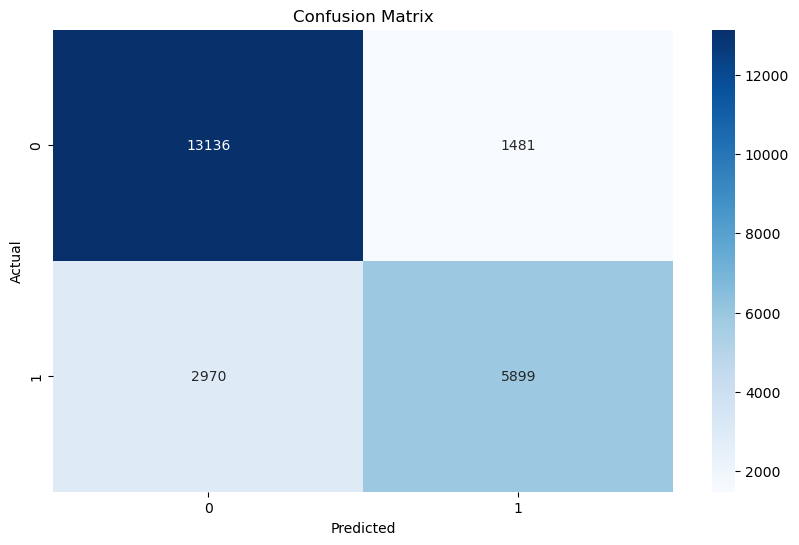

In [199]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()